# Predict Model

In [1]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
  
# suppress warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,ID,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
0,Train_0000,Apartment,3,28.638710,77.295822,Delhi East,0.312579,22.646032,11.726966,7.352495,83.61,307
1,Train_0001,Independent Floor,1,28.498940,77.207191,Delhi South,2.486167,13.500583,7.527761,15.877066,83.61,110
2,Train_0002,Independent Floor,3,28.714123,77.154404,Delhi North,1.528794,18.918243,17.135939,10.315737,78.97,369
3,Train_0003,Independent Floor,3,28.704330,77.149956,Other,0.967121,17.749252,16.251937,9.797817,162.58,676
4,Train_0004,Apartment,4,28.577915,77.049446,Dwarka,0.834506,4.288189,15.541840,18.179806,218.32,418
...,...,...,...,...,...,...,...,...,...,...,...,...
8687,Train_8687,Apartment,1,28.602234,77.026001,Dwarka,0.005681,7.776390,18.212199,19.535831,46.45,159
8688,Train_8688,Apartment,1,28.644989,77.169296,Delhi Central,0.007987,12.969368,9.442664,5.039023,81.29,172
8689,Train_8689,Independent Floor,3,28.547377,77.259155,Delhi South,0.203502,17.094466,5.468956,11.109941,148.64,738
8690,Train_8690,Independent Floor,1,28.630501,77.277382,Delhi East,0.248603,20.628700,9.801128,5.679541,41.90,184


In [4]:
test

,ID,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters)
0,Test_0000,Independent House,1,28.644199,77.162407,Delhi Central,0.675741,12.480545,9.653289,5.706151,55.74
1,Test_0001,Independent Floor,3,28.724508,77.087051,West Delhi,1.992787,18.799390,21.086929,15.963967,88.26
2,Test_0002,Independent Floor,3,28.672693,77.103973,West Delhi,0.678442,13.190977,15.514042,11.916831,111.48
3,Test_0003,Independent Floor,1,28.645021,77.169235,Delhi Central,0.003422,12.968327,9.448341,5.045234,59.92
4,Test_0004,Independent Floor,1,28.607435,77.289627,Delhi East,0.299808,20.878677,9.180785,7.736478,27.87
...,...,...,...,...,...,...,...,...,...,...,...
8688,Test_8688,Apartment,3,28.586784,77.071671,Dwarka,1.060178,3.756045,13.500350,15.794588,148.64
8689,Test_8689,Independent Floor,3,28.646486,77.165459,Delhi Central,0.403543,12.863598,9.748500,5.426976,88.26
8690,Test_8690,Apartment,2,28.727852,77.086617,West Delhi,2.138730,19.169468,21.418370,16.214014,83.61
8691,Test_8691,Apartment,1,28.698778,77.145348,North Delhi,0.449243,17.014223,15.844727,9.709162,51.10


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      8692 non-null   object 
 1   propertyType            8692 non-null   object 
 2   bedrooms                8692 non-null   int64  
 3   latitude                8692 non-null   float64
 4   longitude               8692 non-null   float64
 5   suburbName              8692 non-null   object 
 6   distanceMetro(km)       8692 non-null   float64
 7   distanceAirport(km)     8692 non-null   float64
 8   distanceHospital(km)    8692 non-null   float64
 9   distanceRailway(km)     8692 non-null   float64
 10  area(square_meters)     8692 non-null   float64
 11  monthlyRent(us_dollar)  8692 non-null   int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 815.0+ KB


In [6]:
train.describe()

,bedrooms,latitude,longitude,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
count,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000
mean,2.119650,28.611199,77.167464,0.869998,13.699359,11.373803,11.419991,101.990737,321.376898
std,0.900757,0.070853,0.093600,1.261337,7.926709,7.500915,7.345131,59.355027,230.962181
min,1.000000,26.467743,76.742523,0.002892,1.901789,0.669150,0.722023,9.290000,14.000000
25%,1.000000,28.563490,77.102028,0.459687,11.152285,8.167231,8.075549,55.740000,159.000000
50%,2.000000,28.616885,77.168053,0.698592,13.139656,10.922441,11.244344,83.610000,258.000000
75%,3.000000,28.651827,77.224998,1.092694,17.225196,15.548549,15.435535,139.350000,393.000000
max,8.000000,28.872597,80.339027,65.866623,396.043067,387.016246,390.969378,882.580000,1476.000000


In [7]:
train.describe(include = ['O']) # 범주형

,ID,propertyType,suburbName
count,8692,8692,8692
unique,8692,4,12
top,Train_0000,Independent Floor,Delhi South
freq,1,5439,1705


In [8]:
train['propertyType'].unique()

array(['Apartment', 'Independent Floor', 'Independent House', 'Villa'],
      dtype=object)

In [9]:
train['suburbName'].unique()

array(['Delhi East', 'Delhi South', 'Delhi North', 'Other', 'Dwarka',
       'West Delhi', 'Delhi Central', 'North Delhi', 'South West Delhi',
       'Delhi West', 'Rohini', 'North West Delhi'], dtype=object)

## EDA

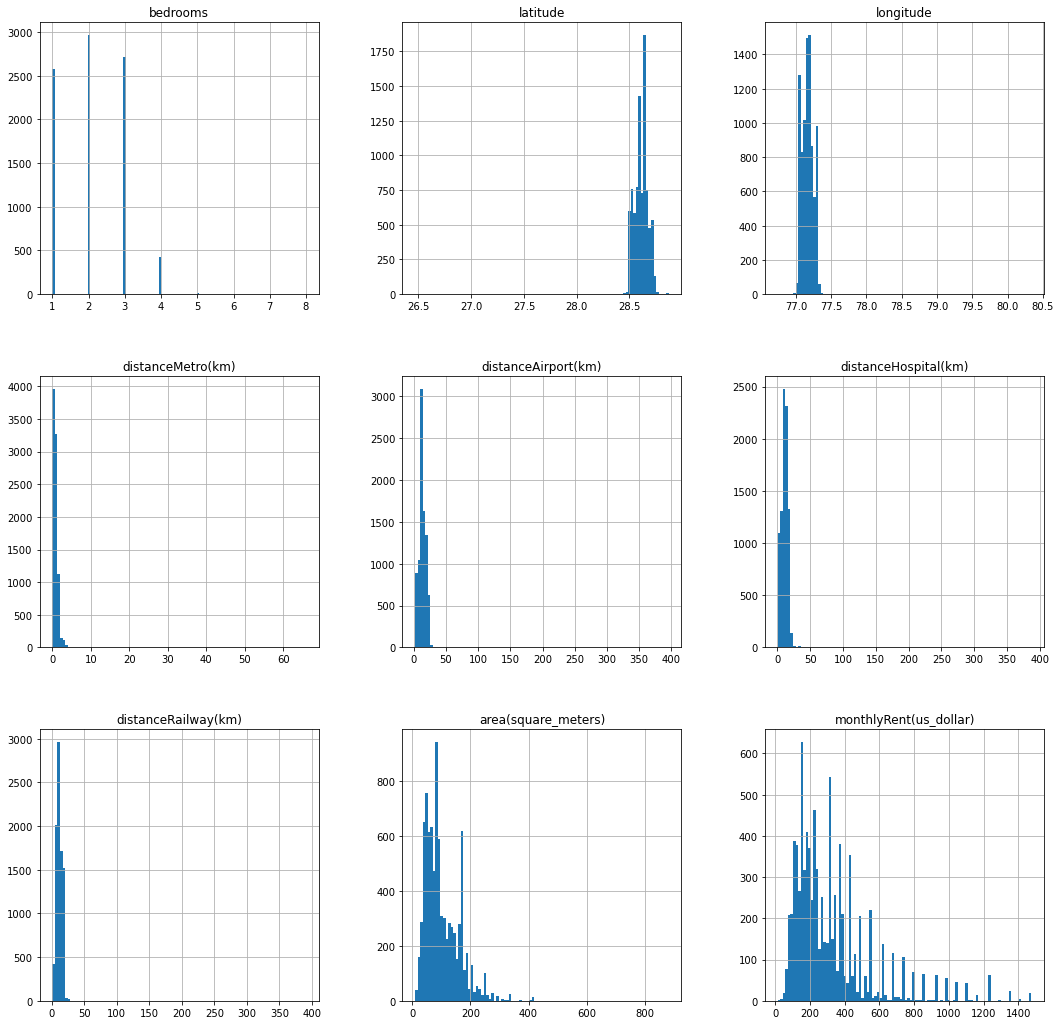

In [10]:
# 양적 변수 분포 시각화
train.hist(bins = 100, figsize = (18,18))
plt.show()

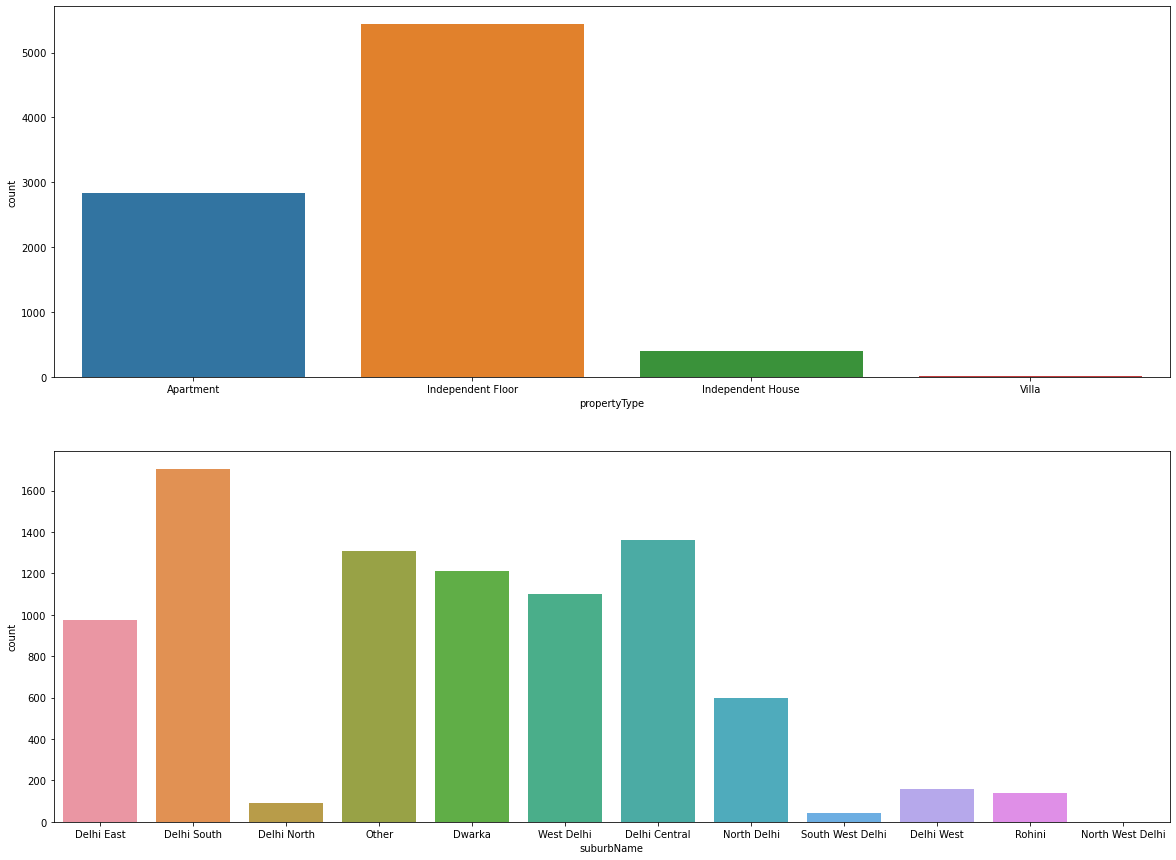

In [11]:
# 질적 변수 빈도 시각화
fig, axes = plt.subplots(2,1, figsize = (20,15))

sns.countplot(x = train['propertyType'], ax=axes[0])
sns.countplot(x = train['suburbName'], ax= axes[1])
plt.show()

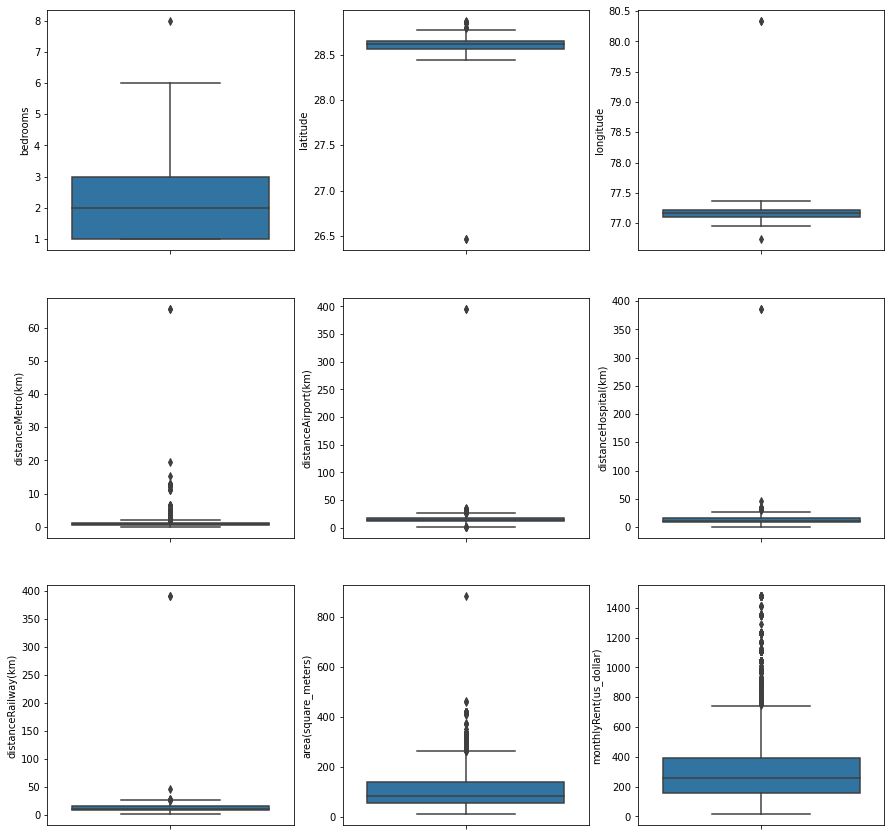

In [12]:
# 이상치 확인
fig, axes = plt.subplots(3,3, figsize = (15,15))

sns.boxplot(y = train['bedrooms'], ax=axes[0][0])
sns.boxplot(y = train['latitude'], ax=axes[0][1])
sns.boxplot(y = train['longitude'], ax=axes[0][2])

sns.boxplot(y = train['distanceMetro(km)'], ax=axes[1][0])
sns.boxplot(y = train['distanceAirport(km)'], ax=axes[1][1])
sns.boxplot(y = train['distanceHospital(km)'], ax=axes[1][2])

sns.boxplot(y = train['distanceRailway(km)'], ax=axes[2][0])
sns.boxplot(y = train['area(square_meters)'], ax=axes[2][1])
sns.boxplot(y = train['monthlyRent(us_dollar)'], ax=axes[2][2])

plt.show()

In [13]:
train.columns

Index(['ID', 'propertyType', 'bedrooms', 'latitude', 'longitude', 'suburbName',
       'distanceMetro(km)', 'distanceAirport(km)', 'distanceHospital(km)',
       'distanceRailway(km)', 'area(square_meters)', 'monthlyRent(us_dollar)'],
      dtype='object')

In [14]:
def get_outlier(df=None, column = None, weight = 1.5) :
    quantile_25 = np.percentile(train[column].values, 25)
    quantile_75 = np.percentile(train[column].values, 75)

    IQR = quantile_75 - quantile_25 
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = train[column][ (train[column] < lowest ) | (train[column] > highest)].index
    return outlier_idx

In [15]:
outlier_idx = get_outlier(df  = train, column = 'distanceMetro(km)', weight = 1.5)
train.drop(outlier_idx, axis= 0, inplace = True)

outlier_idx = get_outlier(df  = train, column = 'distanceAirport(km)', weight = 1.5)
train.drop(outlier_idx, axis= 0, inplace = True)

outlier_idx = get_outlier(df  = train, column = 'distanceHospital(km)', weight = 1.5)
train.drop(outlier_idx, axis= 0, inplace = True)

outlier_idx = get_outlier(df  = train, column = 'distanceRailway(km)', weight = 1.5)
train.drop(outlier_idx, axis= 0, inplace = True)

outlier_idx = get_outlier(df  = train, column = 'area(square_meters)',  weight = 1.5)
train.drop(outlier_idx, axis= 0, inplace = True)

train

,ID,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
0,Train_0000,Apartment,3,28.638710,77.295822,Delhi East,0.312579,22.646032,11.726966,7.352495,83.61,307
2,Train_0002,Independent Floor,3,28.714123,77.154404,Delhi North,1.528794,18.918243,17.135939,10.315737,78.97,369
3,Train_0003,Independent Floor,3,28.704330,77.149956,Other,0.967121,17.749252,16.251937,9.797817,162.58,676
4,Train_0004,Apartment,4,28.577915,77.049446,Dwarka,0.834506,4.288189,15.541840,18.179806,218.32,418
5,Train_0005,Apartment,2,28.574133,77.161316,Other,1.411980,7.796076,4.619386,9.476784,83.61,688
...,...,...,...,...,...,...,...,...,...,...,...,...
8687,Train_8687,Apartment,1,28.602234,77.026001,Dwarka,0.005681,7.776390,18.212199,19.535831,46.45,159
8688,Train_8688,Apartment,1,28.644989,77.169296,Delhi Central,0.007987,12.969368,9.442664,5.039023,81.29,172
8689,Train_8689,Independent Floor,3,28.547377,77.259155,Delhi South,0.203502,17.094466,5.468956,11.109941,148.64,738
8690,Train_8690,Independent Floor,1,28.630501,77.277382,Delhi East,0.248603,20.628700,9.801128,5.679541,41.90,184


In [16]:
train = train.reset_index(drop=True)
train

,ID,propertyType,bedrooms,latitude,longitude,suburbName,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters),monthlyRent(us_dollar)
0,Train_0000,Apartment,3,28.638710,77.295822,Delhi East,0.312579,22.646032,11.726966,7.352495,83.61,307
1,Train_0002,Independent Floor,3,28.714123,77.154404,Delhi North,1.528794,18.918243,17.135939,10.315737,78.97,369
2,Train_0003,Independent Floor,3,28.704330,77.149956,Other,0.967121,17.749252,16.251937,9.797817,162.58,676
3,Train_0004,Apartment,4,28.577915,77.049446,Dwarka,0.834506,4.288189,15.541840,18.179806,218.32,418
4,Train_0005,Apartment,2,28.574133,77.161316,Other,1.411980,7.796076,4.619386,9.476784,83.61,688
...,...,...,...,...,...,...,...,...,...,...,...,...
8188,Train_8687,Apartment,1,28.602234,77.026001,Dwarka,0.005681,7.776390,18.212199,19.535831,46.45,159
8189,Train_8688,Apartment,1,28.644989,77.169296,Delhi Central,0.007987,12.969368,9.442664,5.039023,81.29,172
8190,Train_8689,Independent Floor,3,28.547377,77.259155,Delhi South,0.203502,17.094466,5.468956,11.109941,148.64,738
8191,Train_8690,Independent Floor,1,28.630501,77.277382,Delhi East,0.248603,20.628700,9.801128,5.679541,41.90,184


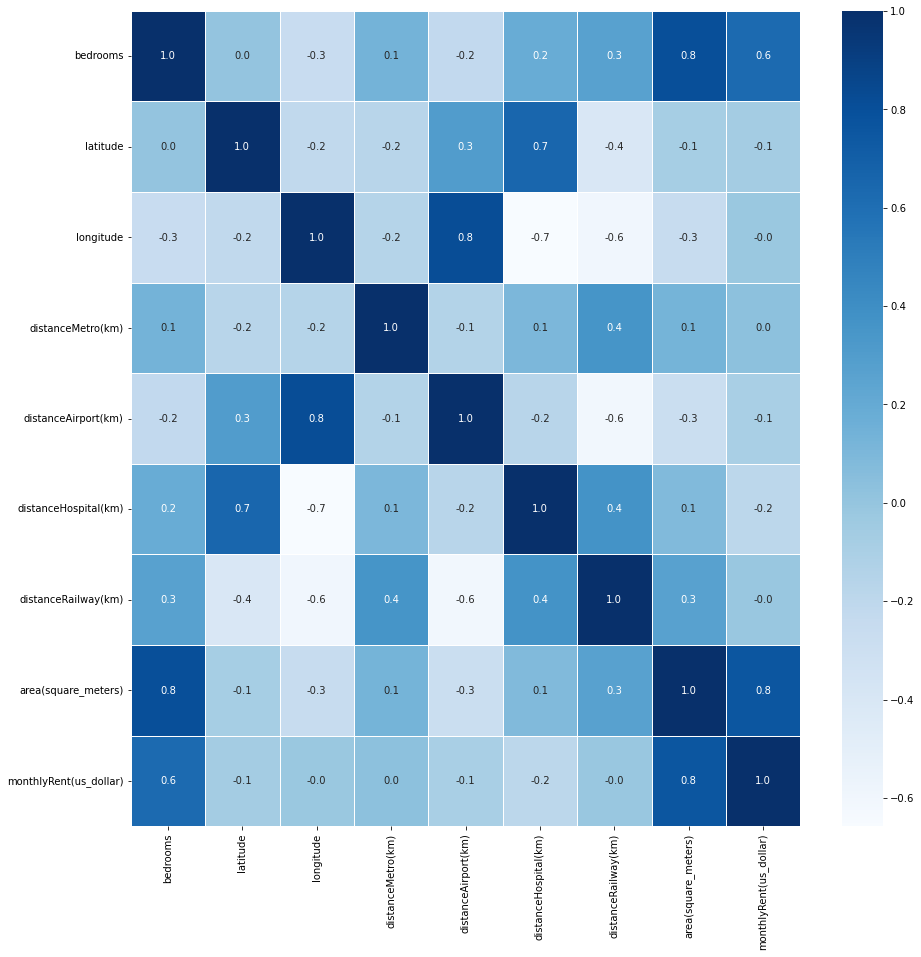

In [17]:
#상관관계 히트맵
plt.figure(figsize = (15,15))
sns.heatmap(train.corr(), annot = True, fmt = '.1f', linewidth = 1, cmap = 'Blues')

plt.show()

# Data Preprocessing

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
x_train = train.drop(columns=['ID', 'monthlyRent(us_dollar)','suburbName'])
y_train = train['monthlyRent(us_dollar)']
x_test  = test.drop(columns=['ID','suburbName'])

In [31]:
x_train.describe(include = ['O'])

,propertyType
count,8193
unique,4
top,Independent Floor
freq,5177


In [32]:
x_test.describe(include = ['O'])

,propertyType
count,8693
unique,4
top,Independent Floor
freq,5402


In [33]:
y_train

0       307
1       369
2       676
3       418
4       688
       ... 
8188    159
8189    172
8190    738
8191    184
8192    319
Name: monthlyRent(us_dollar), Length: 8193, dtype: int64

In [34]:
x_test

,propertyType,bedrooms,latitude,longitude,distanceMetro(km),distanceAirport(km),distanceHospital(km),distanceRailway(km),area(square_meters)
0,Independent House,1,28.644199,77.162407,0.675741,12.480545,9.653289,5.706151,55.74
1,Independent Floor,3,28.724508,77.087051,1.992787,18.799390,21.086929,15.963967,88.26
2,Independent Floor,3,28.672693,77.103973,0.678442,13.190977,15.514042,11.916831,111.48
3,Independent Floor,1,28.645021,77.169235,0.003422,12.968327,9.448341,5.045234,59.92
4,Independent Floor,1,28.607435,77.289627,0.299808,20.878677,9.180785,7.736478,27.87
...,...,...,...,...,...,...,...,...,...
8688,Apartment,3,28.586784,77.071671,1.060178,3.756045,13.500350,15.794588,148.64
8689,Independent Floor,3,28.646486,77.165459,0.403543,12.863598,9.748500,5.426976,88.26
8690,Apartment,2,28.727852,77.086617,2.138730,19.169468,21.418370,16.214014,83.61
8691,Apartment,1,28.698778,77.145348,0.449243,17.014223,15.844727,9.709162,51.10


In [35]:
# qualitative column one-hot encoding
qual_col = ['propertyType']
ohe = OneHotEncoder(sparse=False)

for i in qual_col:
    x_train = pd.concat([x_train, pd.DataFrame(ohe.fit_transform(x_train[[i]]), columns=ohe.categories_[0])], axis=1)
    
    for qual_value in np.unique(x_test[i]): 
        if qual_value not in np.unique(ohe.categories_): 
            ohe.categories_ = np.append(ohe.categories_, qual_value)
    # One Hot Encoder가 Test 데이터로부터 Fitting되는 것은 Data Leakage이므로, Test 데이터에는 Train 데이터로 Fitting된 One Hot Encoder로부터 transform만 수행되어야 합니다.
    x_test = pd.concat([x_test, pd.DataFrame(ohe.transform(x_test[[i]]), columns=ohe.categories_[0])], axis=1)
    
x_train = x_train.drop(qual_col, axis=1)
x_test = x_test.drop(qual_col, axis=1)
print('Done.')

Done.


In [36]:
from supervised.automl import AutoML

In [37]:
automl = AutoML(mode="Compete", eval_metric='mae')

In [38]:
automl.fit(x_train, y_train)

AutoML directory: AutoML_3
The task is regression with evaluation metric mae
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree mae 83.453306 trained in 0.38 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle
* Step simple_algorithms will try to check up to 4 models
1_DecisionTree mae 81.61298 trained in 2.6 seconds
2_DecisionTree mae 75.723949 trained in 2.4 seconds
3_DecisionTree mae 75.723949 trained in 2.14 seconds
4_Linear mae 

AutoML(eval_metric='mae', mode='Compete')

In [39]:
idtest = test['ID']
idtest

0       Test_0000
1       Test_0001
2       Test_0002
3       Test_0003
4       Test_0004
          ...    
8688    Test_8688
8689    Test_8689
8690    Test_8690
8691    Test_8691
8692    Test_8692
Name: ID, Length: 8693, dtype: object

In [40]:
y_pred = automl.predict(x_test)

In [41]:
y_pred

array([187.26070659, 222.60976707, 324.75143038, ..., 195.79263718,
       155.09301949, 178.89560698])

# Submission

In [42]:
# Submission
submission = pd.DataFrame({"monthlyRent(us_dollar)" : train['monthlyRent(us_dollar)'], "monthlyRent(us_dollar)":y_pred})

submission

,monthlyRent(us_dollar)
0,187.260707
1,222.609767
2,324.751430
3,174.188027
4,79.523275
...,...
8688,361.458110
8689,350.330024
8690,195.792637
8691,155.093019


In [43]:
results = pd.concat([idtest,submission],axis=1)
results

,ID,monthlyRent(us_dollar)
0,Test_0000,187.260707
1,Test_0001,222.609767
2,Test_0002,324.751430
3,Test_0003,174.188027
4,Test_0004,79.523275
...,...,...
8688,Test_8688,361.458110
8689,Test_8689,350.330024
8690,Test_8690,195.792637
8691,Test_8691,155.093019


In [44]:
results = pd.DataFrame(results)

In [45]:
results.to_csv("AutoML_submission_nosuburb.csv", index = False)